In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [106]:
df = pd.read_csv('./hour.csv')
df.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


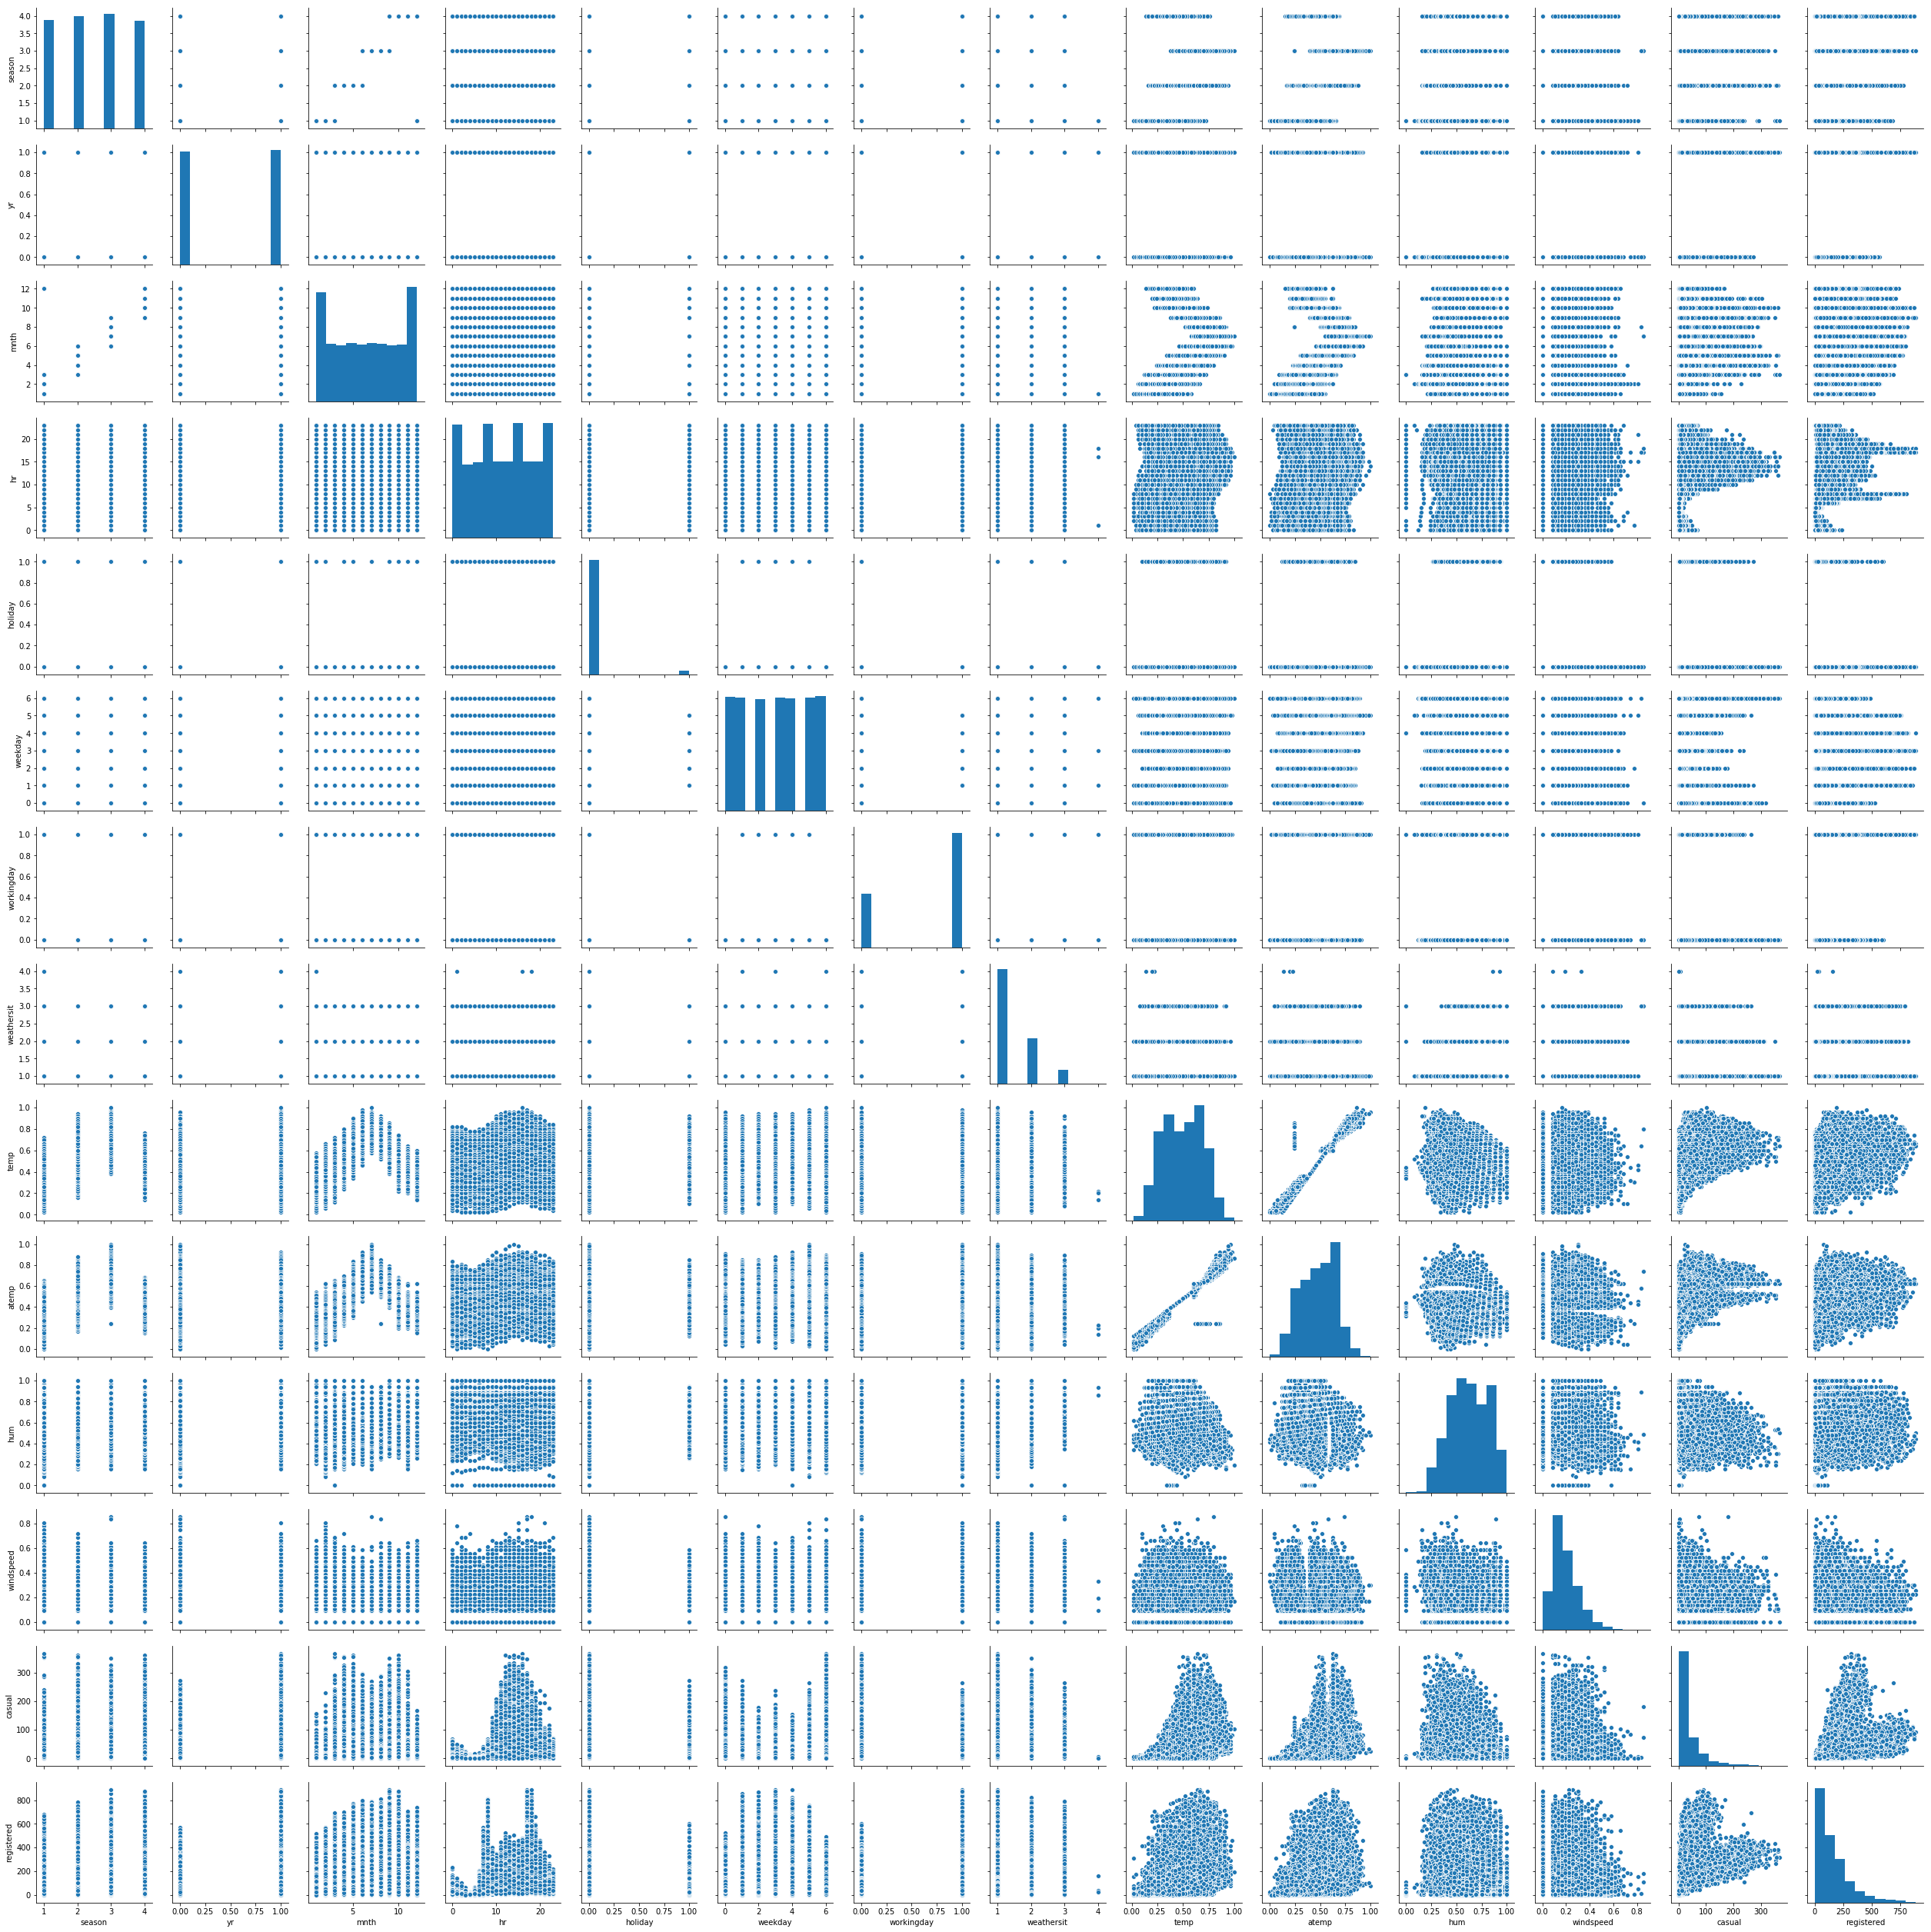

In [107]:
sns.pairplot(data=df.iloc[:, 2:16])

### 使用第一個Model(LinearRegression)

In [108]:
from sklearn.linear_model import LinearRegression

In [109]:
model = LinearRegression()

In [110]:
from sklearn.model_selection import train_test_split

In [117]:
# X = df.iloc[:, 2:14].values
X = df.iloc[:, [2,3,5,6,8,9,10,11,12,13]].values
y = df["registered"].values
X_train, X_test, y_train, y_test= train_test_split(X,y)

In [118]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [119]:
predict_y = model.predict(X_train)

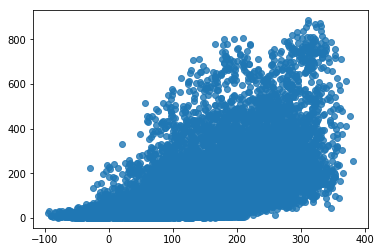

In [120]:
sns.regplot(x=predict_y, y=y_train, fit_reg=False)

In [121]:
model.score(X_train, y_train)

0.33570494585239286

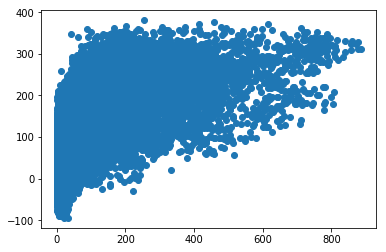

In [122]:
plt.scatter(y_train, predict_y)

In [123]:
model.coef_

array([  18.48813603,   68.94440731,    6.43664507,  -11.17530434,
         40.65520045,   -4.74578247,   30.71466333,  168.78399466,
       -134.22534199,   31.32614589])

### 第二個model(kernelSVM_rbf)

In [124]:
from sklearn.svm import SVR

In [125]:
model2 = SVR(C=10, kernel='rbf')

In [126]:
model2.fit(X=X_train, y=y_train)

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [127]:
predict_y2 = model2.predict(X_test)

In [128]:
model2.score(X=X_train, y=y_train)

0.8286241563366212

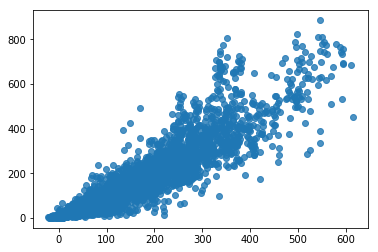

In [129]:
sns.regplot(x=predict_y2, y=y_test, fit_reg=False)

### 第三個model(kernelSVM_poly)

In [130]:
model3 = SVR(kernel='poly', degree=3)

In [131]:
model3.fit(X=X_train, y=y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [132]:
predict_y3 = model3.predict(X_test)

In [133]:
model3.score(X=X_train, y=y_train)

0.37585802135966795

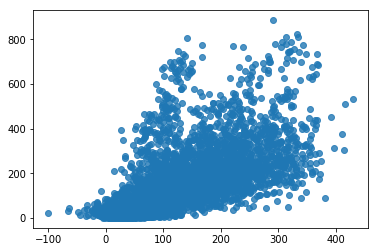

In [134]:
sns.regplot(x=predict_y3, y=y_test, fit_reg=False)

### 目前看起來以model2(高斯kernel SVM)的模型擬合出來的效果較好